In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read the image
image = cv2.imread('../06-Convolutional-Neural-Network\images\girl.png', 0)  # Update the path to the correct location of the image file




In [9]:
# get the image size
rows, cols = image.shape

# compute the 2D Fourier transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)



In [17]:
filtered_values = f[(np.abs(f) > 200) & (np.abs(f) < 500)]
print(filtered_values)

[  34.2789489 +308.81323388j  134.13112805-262.46818546j
 -183.97195508+452.04184084j ... -183.97195508-452.04184084j
  134.13112805+262.46818546j   34.2789489 -308.81323388j]


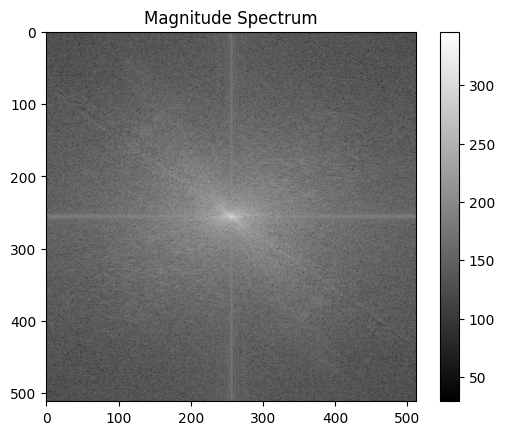

In [14]:
# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Add 1 to avoid log(0)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

In [10]:
# create a Gaussian Low Pass Filter
D0 = 30  # cutoff frequency
x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)
D = np.sqrt((X - cols//2)**2 + (Y - rows//2)**2)
H = np.exp(-(D**2) / (2 * (D0**2)))

# apply the filter
fshift_filtered = fshift * H

# inverse FFT to get back to spatial domain
f_ishift = np.fft.ifftshift(fshift_filtered)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)



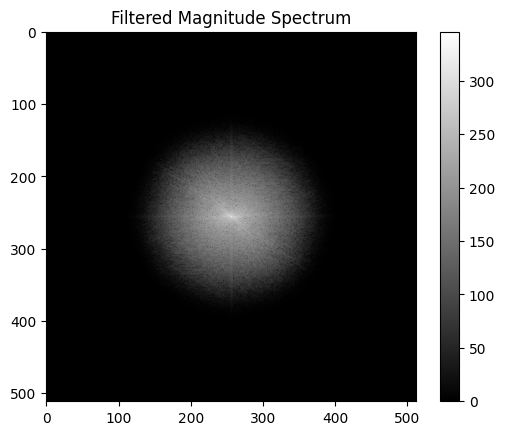

In [19]:
# Compute the magnitude spectrum of the filtered Fourier transform
magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)  # Add 1 to avoid log(0)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Magnitude Spectrum')
plt.colorbar()
plt.show()

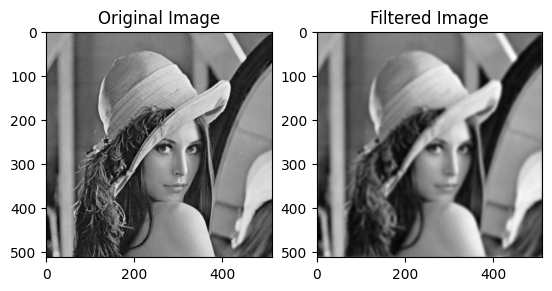

In [11]:
# show the original and filtered image
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image_back, cmap='gray'), plt.title('Filtered Image')
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('../06-Convolutional-Neural-Network\images\girl.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))  # Resize for easier computation

# Compute the 2D Fourier Transform of the image
f_image = np.fft.fftshift(np.fft.fft2(image))

# Get the magnitude and phase of the Fourier Transform
magnitude = np.abs(f_image)
phase = np.angle(f_image)

# Create an ideal low-pass filter (circular)
def ideal_low_pass_filter(size, cutoff):
    rows, cols = size
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    center = (crow, ccol)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff:
                mask[i, j] = 1
    return mask

# Apply the low-pass filter
cutoff_frequency = 30  # Define cutoff frequency in pixels
lp_filter = ideal_low_pass_filter(image.shape, cutoff_frequency)

# Apply the filter to the Fourier Transform of the image
f_image_filtered = f_image * lp_filter

# Perform the inverse FFT to get the filtered image
filtered_image = np.fft.ifft2(np.fft.if_
